In [1]:
#imported some data cleaning and data visualization libraries

import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#readed all csv files

reviews = pd.read_csv("reviews.csv")
calendar = pd.read_csv("calendar.csv")
listings = pd.read_csv("listings.csv")

#### Showing Data İnfo

In [3]:
#show info calendar values
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [4]:
#show info reviews values
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [5]:
#show info listings values
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

#### For Look and Review Random 5 Sample

In [6]:
reviews.sample(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
72647,1145941,15443798,2014-07-09,2723586,Leah,Terry's house was spacious for our family of s...
58242,7953211,54782477,2015-11-23,47630528,Sam,My husband and I stayed here for about a week ...
52910,5695717,32562004,2015-05-19,7291081,Austin,Colum was a great host. He actively made sure ...
82382,11012,17662745,2014-08-15,19841774,Rupali,We had a great time. The house reminded me of...
47994,132160,29456075,2015-04-07,20389840,Vanilla,Sorry to write the review late. As my mum and ...


In [7]:
calendar.sample(5)

,listing_id,date,available,price
238560,8174389,2016-08-06,f,NaN
1272730,3303376,2016-12-09,t,$77.00
874356,8555304,2016-07-03,t,$85.00
115549,10265391,2016-07-31,t,$70.00
1364220,8412143,2016-08-06,t,$125.00


In [8]:
listings.sample(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2676,6477225,https://www.airbnb.com/rooms/6477225,20160104002432,2016-01-04,Capitol Hill 2 BR near Downtown,A 2 bedroom apartment in the lower level of a ...,The Space Our two bedroom apartment is in the ...,A 2 bedroom apartment in the lower level of a ...,none,"Parks, grocery stores, restaurants are all nea...",...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.71
3180,8373664,https://www.airbnb.com/rooms/8373664,20160104002432,2016-01-04,Bright and Sunny 1 bedroom Apt.,"Are you in town for business or vacation, this...",This apartment is located on the second floor....,"Are you in town for business or vacation, this...",none,We are located in the Lower Queen Anne neighbo...,...,10.0,f,NaN,WASHINGTON,t,flexible,f,f,5,1.13
755,8174626,https://www.airbnb.com/rooms/8174626,20160104002432,2016-01-04,UW Studio Apartment,This cozy studio apartment is located in the h...,NaN,This cozy studio apartment is located in the h...,none,NaN,...,10.0,f,NaN,WASHINGTON,t,strict,f,f,2,3.56
1299,217142,https://www.airbnb.com/rooms/217142,20160104002432,2016-01-04,SPACIOUS 2BD/2BA PRKG FREE WiFi,Check the calendar for mid week sales and one ...,COMPLETELY RENOVATED! Luxurious and spacious c...,Check the calendar for mid week sales and one ...,none,NaN,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.92
3017,6821407,https://www.airbnb.com/rooms/6821407,20160104002432,2016-01-04,Simple private room near downtown,Come enjoy Seattle! This is a private bedroom ...,"This is a new home, with easy access to Downto...",Come enjoy Seattle! This is a private bedroom ...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,5.56


### Calendar Operations

In [9]:
#show any nan values 
calendar[calendar.isna().any(axis=1)]

,listing_id,date,available,price
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [10]:
#drop nan values
calendar.dropna(inplace=True)

#reset index after drop
calendar.reset_index(drop=True,inplace=True)

In [11]:
# preprocessing
# organizing dirty and object type price data
calendar["price"] = pd.DataFrame([i[1:-1].replace(",","") for i in calendar["price"]]).astype(float)

In [29]:
#group by date and show price sum - 365 days and earn for each day
calendar_date_price = calendar.groupby("date")["price"].sum()
date_price = pd.DataFrame({"date":calendar_date_price.index.values,"price":calendar_date_price.values})
date_price

,date,price
0,2016-01-04,211819.0
1,2016-01-05,225312.0
2,2016-01-06,220815.0
3,2016-01-07,214823.0
4,2016-01-08,227456.0
...,...,...
360,2016-12-29,391359.0
361,2016-12-30,411057.0
362,2016-12-31,416551.0
363,2017-01-01,403607.0


[]

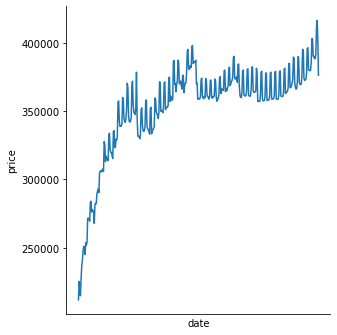

In [13]:
#earn by day chart

board = sns.relplot(x="date", y="price", kind="line", ci="sd", data=date_price);
board.set(xticks=[])
plt.plot()

### Reviews Operations

In [14]:
#find null vals
null_reviews = reviews[reviews.isna().any(axis=1)]
null_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
11034,461567,11614247,2014-04-09,12120141,Abbey,NaN
15383,9460,10563024,2014-02-24,12498029,Debra,NaN
15914,2906694,48629316,2015-09-27,44218980,Anush,NaN
16097,910784,9950520,2014-01-21,179481,Enrico,NaN
27280,10695,52378,2010-06-13,105412,Wei,NaN
29467,1018204,10024984,2014-01-26,10571694,Jordan,NaN
30619,6079216,34824019,2015-06-12,31556342,Mack,NaN
31414,3354614,18103248,2014-08-21,12426758,Jeff,NaN
35210,3554558,24863045,2015-01-03,24488791,Eleanor,NaN
37971,1790020,15640556,2014-07-13,16884291,Michael,NaN


In [15]:
#drop null vals
reviews.drop(null_reviews.index, inplace=True)
#for reset index
reviews = reviews.reset_index(drop=True)

In [16]:
# member names that make the most transactions

review_values = reviews["reviewer_name"].value_counts()
review_values

David         870
Michael       820
Sarah         681
John          608
Chris         570
             ... 
Mazen           1
Susmita         1
Audy            1
Jenn & Ant      1
Xylina          1
Name: reviewer_name, Length: 14377, dtype: int64

In [17]:
# data to text
review_values = " ".join(review_values.index);

(-0.5, 1999.5, 999.5, -0.5)

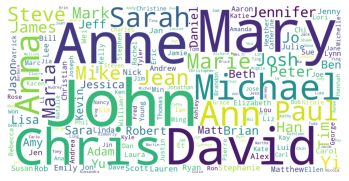

In [18]:
# show word chart
word_cloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 1000, width = 2000).generate(review_values)
plt.imshow(word_cloud)
plt.axis("off")

### Listings Operations

In [19]:
# drop full-null columns
listings.drop(["license","square_feet"],axis=1,inplace=True)

In [20]:
#relationship between price and zip code
listings[["price","zipcode"]].groupby("zipcode").count()

,price
zipcode,
98101,201
98102,339
98103,394
98104,95
98105,225
98106,58
98107,180
98108,56
98109,202


In [21]:
#drop "99\n98122" object(string) value

listings.zipcode = listings.zipcode[listings.zipcode!="99\n98122"]

In [22]:
#take price and zipcode
price_zipcode = listings[["zipcode","price"]]
price_zipcode

,zipcode,price
0,98119,$85.00
1,98119,$150.00
2,98119,$975.00
3,98119,$100.00
4,98119,$450.00
...,...,...
3813,98107,$359.00
3814,98102,$79.00
3815,98178,$93.00
3816,98112,$99.00


In [23]:
#drop null values
price_zipcode = price_zipcode.dropna()

In [24]:
#cleaning price data 
price_zipcode["price"] = pd.DataFrame([i[1:-1].replace(",","") for i in price_zipcode["price"]]).astype(float)

c:\users\tcerdogan\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
#group by zipcode earns
zipcode_earns = price_zipcode.groupby("zipcode").sum()

In [26]:
#sort earns
zipcode_earns = zipcode_earns.sort_values("price",)
zipcode_earns

,price
zipcode,
98178,337.0
98134,619.0
98146,739.0
98177,1969.0
98133,4521.0
98136,5326.0
98108,5449.0
98125,6169.0
98126,6505.0


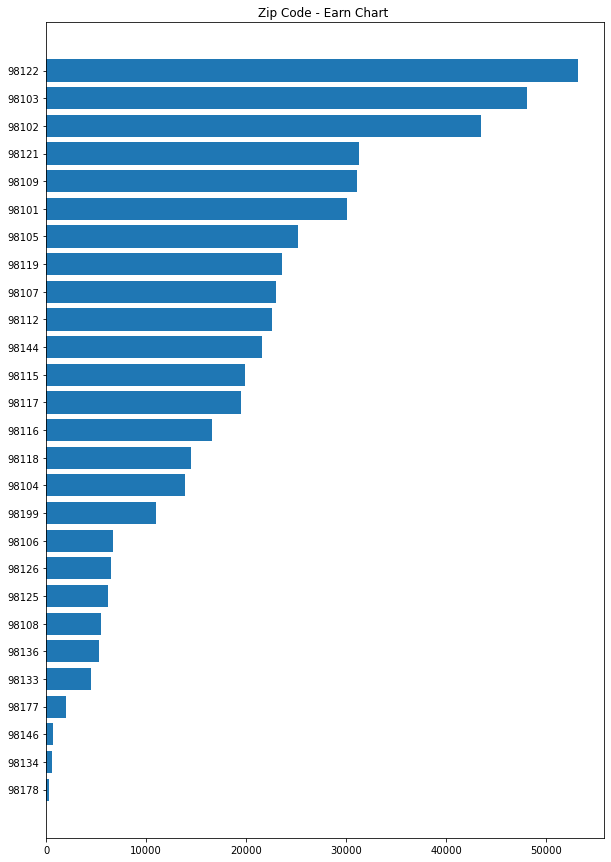

In [27]:
#zipcode and earn relationship chart
plt.figure(figsize=(10,15))
plt.barh(zipcode_earns.index,zipcode_earns.price)
plt.title("Zip Code - Earn Chart ")
plt.show()